In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
import slab
reload(slab)
from slab import SlabOut, CoolingOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

In [28]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"
slab = SlabOut(dir_out+"out_sn_cooling/") 
slab.ReadRates()
slab.ReadThermo()
cooling = CoolingOut(dir_out+"out_sn_cooling/") 

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


In [5]:
G0 = 1.
xi_CR = 1.0e-16
Zd = 1.

In [29]:
fH2_cr = cu.fH2_CR(slab.nHM, kcr=xi_CR, Zd=Zd)
diff_H2 = abs(cooling.abd["H2"]-fH2_cr)

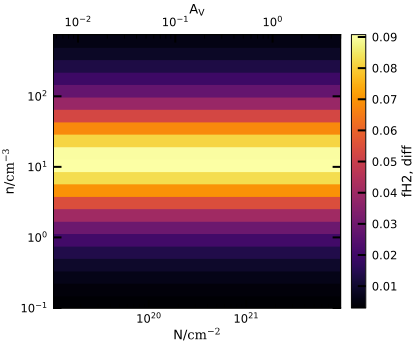

In [30]:
plot_chem.plot_abd(slab, "fH2, diff", plot_field=diff_H2)

In [31]:
fe = np.zeros(slab.nHM.shape)
fe_iter = np.zeros(slab.nHM.shape)
niter = np.zeros(slab.nHM.shape)
GPE = G0*np.exp(-1.87*slab.NHM*Zd/1.87e21)
GCI = G0*np.exp(-3.76*slab.NHM*Zd/1.87e21)
for i in xrange(slab.nHM.shape[0]):
    for j in xrange(slab.nHM.shape[1]):
        fe_iter[i, j], niter[i, j] = cu.fe_iter(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
                                                kcr=xi_CR, Zd=Zd)

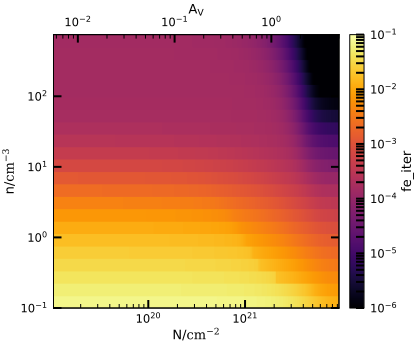

In [32]:
plot_chem.plot_abd(slab, "fe_iter", plot_field=fe_iter, norm=LogNorm(), vmax=0.1, vmin=1e-6)

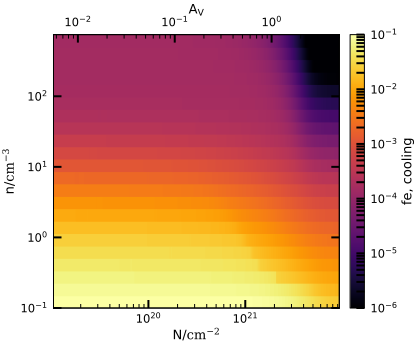

In [34]:
plot_chem.plot_abd(slab, "fe, cooling", plot_field=cooling.abd["e"], norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [55]:
diff_e_cooling = abs(cooling.abd["e"]/(slab.abd["e"]+1e-5)-1)
diff_e = abs(fe_iter/(slab.abd["e"]+1e-5)-1)

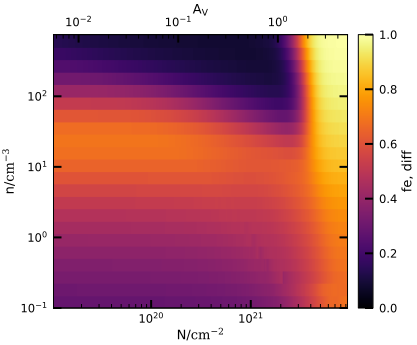

In [56]:
plot_chem.plot_abd(slab, "fe, diff", plot_field=diff_e, vmax=1, vmin=0)

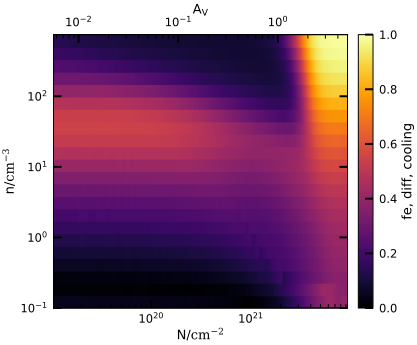

In [57]:
plot_chem.plot_abd(slab, "fe, diff, cooling", plot_field=diff_e_cooling, vmin=0, vmax=1)

In [60]:
fHplus_e = cu.fHplus_e(fe_iter, slab.nHM, slab.abd["T"], GPE, kcr=xi_CR, Zd=Zd)
fCplus_e = cu.fCplus_e(fe_iter, slab.nHM, slab.abd["T"], GPE, GCI, kcr=xi_CR, Zd=Zd)

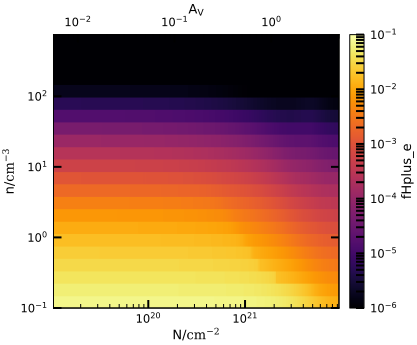

In [61]:
plot_chem.plot_abd(slab, "fHplus_e", plot_field=fHplus_e, norm=LogNorm(), vmax=0.1, vmin=1e-6)

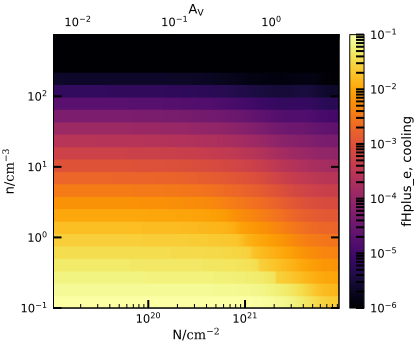

In [62]:
plot_chem.plot_abd(slab, "fHplus_e, cooling", plot_field=cooling.abd["H+"], norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [63]:
diff_Hplus_cooling = abs(cooling.abd["H+"]/(slab.abd["H+"]+1e-5)-1)
diff_Hplus = abs(fHplus_e/(slab.abd["H+"]+1e-5)-1)

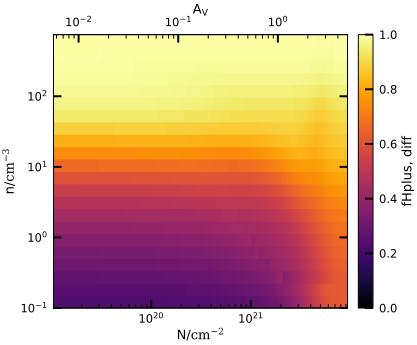

In [64]:
plot_chem.plot_abd(slab, "fHplus, diff", plot_field=diff_Hplus, vmax=1, vmin=0)

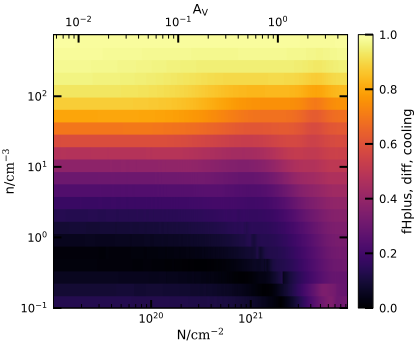

In [65]:
plot_chem.plot_abd(slab, "fHplus, diff, cooling", plot_field=diff_Hplus_cooling, vmax=1, vmin=0)

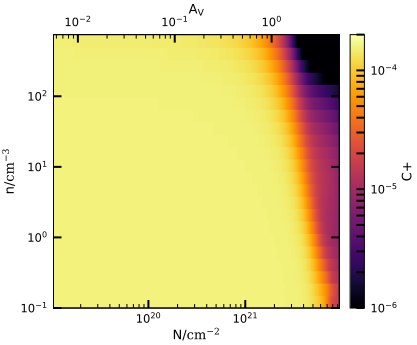

In [74]:
plot_chem.plot_abd(slab, "C+", norm=LogNorm(), vmax=2e-4, vmin=1e-6)

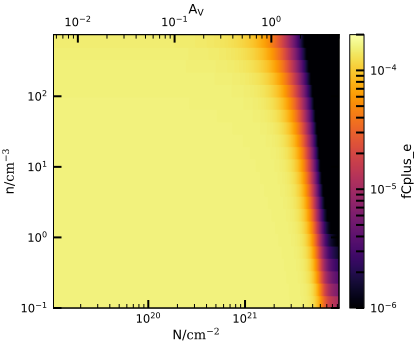

In [67]:
plot_chem.plot_abd(slab, "fCplus_e", plot_field=fCplus_e, norm=LogNorm(), vmax=2e-4, vmin=1e-6)

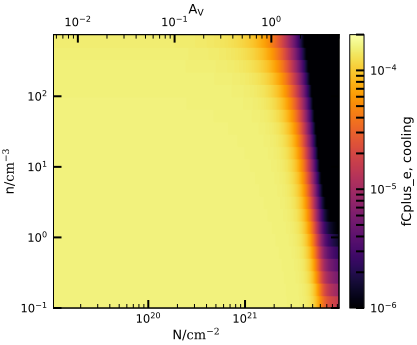

In [68]:
plot_chem.plot_abd(slab, "fCplus_e, cooling", plot_field=cooling.abd["C+"], norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [71]:
diff_Cplus_cooling = abs(cooling.abd["C+"]/(slab.abd["C+"]+1e-5)-1)
diff_Cplus = abs(fCplus_e/(slab.abd["C+"]+1e-5)-1)

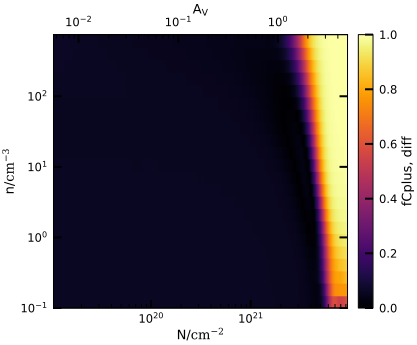

In [72]:
plot_chem.plot_abd(slab, "fCplus, diff", plot_field=diff_Cplus, vmax=1, vmin=0)

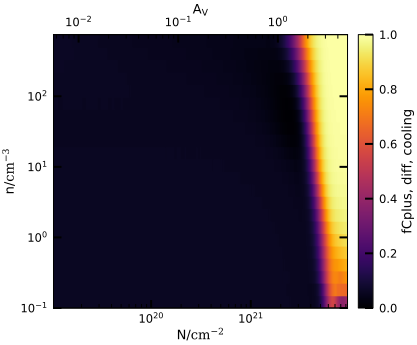

In [73]:
plot_chem.plot_abd(slab, "fCplus, diff, cooling", plot_field=diff_Cplus_cooling, vmax=1, vmin=0)

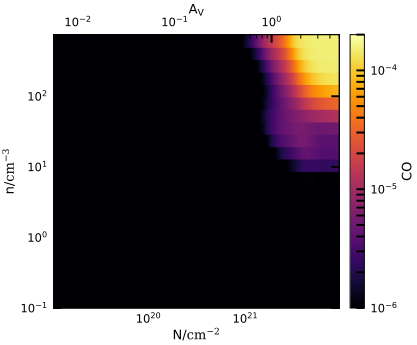

In [75]:
plot_chem.plot_abd(slab, "CO", norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [76]:
GCO = G0*np.exp(-3.88*slab.NHM*Zd/1.87e21)
fCO = cu.fCO(slab.nHM, fCplus_e, fH2_cr, GCO, kcr=xi_CR, Zd=Zd)

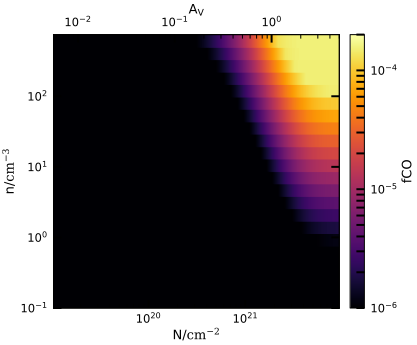

In [77]:
plot_chem.plot_abd(slab, "fCO", plot_field=fCO, norm=LogNorm(), vmax=2e-4, vmin=1e-6)

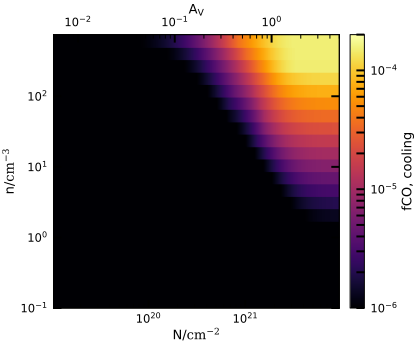

In [78]:
plot_chem.plot_abd(slab, "fCO, cooling", plot_field=cooling.abd["CO"], norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [82]:
diff_CO_cooling = abs((cooling.abd["CO"]-slab.abd["CO"])/(slab.abd["CO"]+1e-5))
diff_CO = abs( (fCO-slab.abd["CO"])/(slab.abd["CO"]+1e-5))

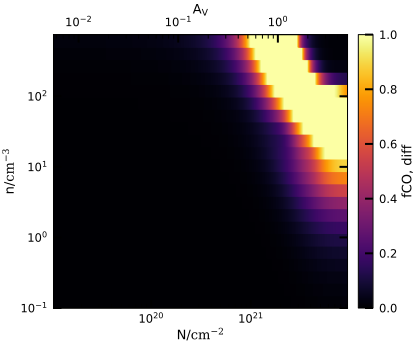

In [83]:
plot_chem.plot_abd(slab, "fCO, diff", plot_field=diff_CO, vmax=1, vmin=0)

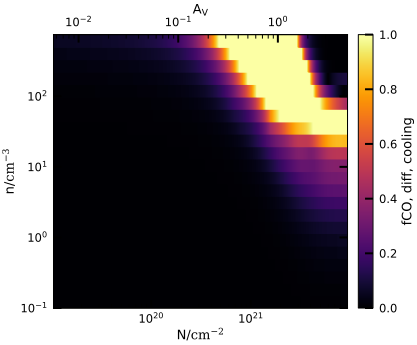

In [84]:
plot_chem.plot_abd(slab, "fCO, diff, cooling", plot_field=diff_CO_cooling, vmax=1, vmin=0)